## Data Input

In [9]:
## Import svi-svi edges
import pandas as pd 
SVI_edges = pd.read_csv('data/graph_building/london_10_landmarks/hetergenous_graph/hetergenous_graph_edges.csv')
SVI_edges

,source,target
0,virtual_100009526,qloOWVZHq3GZEcvENulBtg
1,smI5NVr3YGCHhZ2xGLeVgA,rcT4e98neeJLvDqEKP0Ubw
2,rcT4e98neeJLvDqEKP0Ubw,"virtual_1013566017,1185063017,1185063018,10135..."
3,rcT4e98neeJLvDqEKP0Ubw,B0u0gr1_OECuu45S493L5Q
4,rcT4e98neeJLvDqEKP0Ubw,ohjUTeWeswYYozzbsayGXg
...,...,...
107752,QQ0cc2_O2s0o4YHot-z--Q,RO7W7YDGgLYy8uQecXFbIA
107753,RO7W7YDGgLYy8uQecXFbIA,pN2dUbPJ2ohIp8La6cGzRw
107754,pN2dUbPJ2ohIp8La6cGzRw,Tho45agomox1_gCz41zvwA
107755,RraQcNkpxyrO4_KGO73RvA,fcoTfNB7iI7NLMjOd42ZGg


In [27]:
## Import SVI -landmark edges
import geopandas as gpd
from shapely.geometry import Point

# Load CSV as DataFrame
SVI_landmark_edges = pd.read_csv('data/graph_building/london_10_landmarks/hetergenous_graph/hetergenous_graph_nodes.csv')

# Ensure the latitude and longitude columns exist
if 'latitude' in SVI_landmark_edges.columns and 'longitude' in SVI_landmark_edges.columns:
    # Convert latitude and longitude to Shapely Point geometries
    SVI_landmark_edges['geometry'] = SVI_landmark_edges.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

    # Convert to GeoDataFrame
    SVI_landmark_edges = gpd.GeoDataFrame(SVI_landmark_edges, geometry='geometry', crs="EPSG:27700")
else:
    raise ValueError("The CSV file does not contain 'latitude' and 'longitude' columns.")

# Display result


In [28]:
## Input buildings
building_shard_6000 = gpd.read_file('data/graph_building/london_10_landmarks/hetergenous_graph/bounding_buffer_1000m_building.gpkg')
building_shard_6000 = building_shard_6000.to_crs(27700)
building_shard_6000

,osm_id,code,fclass,name,type,geometry
0,4076420,1500,building,St Brides,church,"MULTIPOLYGON (((531540.669 181138.950, 531574...."
1,4237383,1500,building,ITN,office,"MULTIPOLYGON (((530884.427 182186.605, 530935...."
2,4245075,1500,building,London Waterloo Station,train_station,"MULTIPOLYGON (((530897.748 179593.041, 530897...."
3,4254051,1500,building,O'Donnell Court,apartments,"MULTIPOLYGON (((530245.974 182363.460, 530266...."
4,4254054,1500,building,Foundling Court,apartments,"MULTIPOLYGON (((530177.791 182336.331, 530183...."
...,...,...,...,...,...,...
52694,1243162233,1500,building,None,house,"MULTIPOLYGON (((533466.021 178525.354, 533471...."
52695,1243162234,1500,building,None,house,"MULTIPOLYGON (((533462.106 178528.690, 533467...."
52696,1243162235,1500,building,None,house,"MULTIPOLYGON (((533458.191 178532.037, 533463...."
52697,1243162236,1500,building,None,house,"MULTIPOLYGON (((533454.275 178535.384, 533459...."


<Axes: >

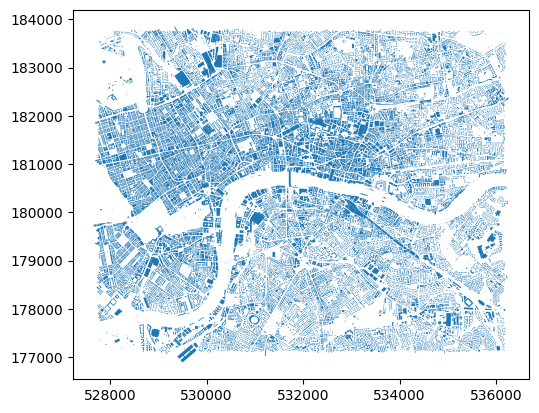

In [29]:
building_shard_6000.plot()

## Calculate the built environment features for SVI nodes

In [31]:
import geopandas as gpd
from shapely.geometry import Point
from PIL import Image
# Load query images
landmark_gdf = gpd.read_file('data/graph_building/london_10_landmarks/hetergenous_graph/landmark_points.gpkg')
landmark_gdf



,latitude,longitude,name,height,area,building_count,area_density,geometry
0,51.500677,-0.124592,big_ben,96,144,30.0,25.4,POINT (530270.542 179638.222)
1,51.514426,-0.080343,gherkin,180,2511,118.0,57.5,POINT (533301.565 181246.682)
2,51.503257,-0.119686,london_eye,135,1145,21.0,15.5,POINT (530603.655 179933.790)
3,51.513725,-0.098357,st_paul,111,7920,66.0,47.3,POINT (532053.692 181136.118)
4,51.505595,-0.075539,tower_bridge,65,2080,40.0,8.7,POINT (533660.676 180273.441)
5,51.504625,-0.086527,the_shard,310,3728,55.0,62.1,POINT (532900.938 180145.578)
6,51.511261,-0.083534,walkie_talkie,160,3721,NaN,NaN,POINT (533087.274 180885.365)
7,51.507896,-0.099348,tate_modern,99,13169,NaN,NaN,POINT (532001.527 180488.586)
8,51.508086,-0.076079,london_tower,27,1174,NaN,NaN,POINT (533614.111 180546.762)
9,51.506660,-0.081383,belfast,20,3039,NaN,NaN,POINT (533265.300 180366.137)


In [32]:
landmark_gdf.to_csv('data/graph_building/london_10_landmarks/hetergenous_graph/landmark_points.csv')

In [39]:
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
from tqdm import tqdm  # Progress bar

# Load your GeoDataFrames
points_gdf = SVI_landmark_edges.copy().drop_duplicates(['node_id']).to_crs(27700)
buildings_gdf = building_shard_6000.copy()

buffer_distance = 100
# Add 100m buffer
points_gdf['buffer'] = points_gdf.geometry.buffer(buffer_distance)

# Initialize result columns
points_gdf['building_count'] = 0
points_gdf['area_density'] = 0.0  # percentage
points_gdf['shortest_distance'] = buffer_distance

# Total buffer area (area of 100m radius circle)
buffer_area = np.pi * (buffer_distance**2)

# Calculate using progress bar
for index, point_row in tqdm(points_gdf.iterrows(), total=points_gdf.shape[0], desc="Processing point data"):
    # Extract buffer geometry
    buffer_geom = point_row['buffer']

    # Find buildings within buffer
    buildings_within_buffer = buildings_gdf[buildings_gdf.geometry.intersects(buffer_geom)]

    # Skip further calculations if no buildings in buffer
    if buildings_within_buffer.empty:
        points_gdf.at[index, 'building_count'] = 0
        points_gdf.at[index, 'area_density'] = 0.0
        points_gdf.at[index, 'shortest_distance'] = buffer_distance
        continue

    # Clip buildings to buffer extent
    buildings_clipped = buildings_within_buffer.copy()
    buildings_clipped['geometry'] = buildings_clipped.geometry.intersection(buffer_geom)

    # Calculate number of buildings
    building_count = len(buildings_clipped)

    # Calculate total area of clipped buildings
    total_area = buildings_clipped.geometry.area.sum()

    # Calculate area density (percentage) and limit decimal places
    area_density_percent = round((total_area / buffer_area) * 100, 1)

    # Calculate shortest distance to nearest building
    shortest_distance = buildings_within_buffer.geometry.distance(point_row.geometry).min()

    # Update results
    points_gdf.at[index, 'building_count'] = building_count
    points_gdf.at[index, 'area_density'] = area_density_percent
    points_gdf.at[index, 'shortest_distance'] = shortest_distance


处理点数据: 100%|████████████████████████████████████████████████████████████████| 35462/35462 [06:19<00:00, 93.56it/s]


In [40]:
points_gdf.columns.unique()

Index(['node_id', 'latitude', 'longitude', 'visibility', 'landmark',
       'geometry', 'buffer', 'building_count', 'area_density',
       'shortest_distance'],
      dtype='object')

In [41]:
# Create a dictionary to map landmark names to their geometries
landmark_dict = landmark_gdf.set_index("name")["geometry"].to_dict()
landmark_dict

{'big_ben': <POINT (530270.542 179638.222)>,
 'gherkin': <POINT (533301.565 181246.682)>,
 'london_eye': <POINT (530603.655 179933.79)>,
 'st_paul': <POINT (532053.692 181136.118)>,
 'tower_bridge': <POINT (533660.676 180273.441)>,
 'the_shard': <POINT (532900.938 180145.578)>,
 'walkie_talkie': <POINT (533087.274 180885.365)>,
 'tate_modern': <POINT (532001.527 180488.586)>,
 'london_tower': <POINT (533614.111 180546.762)>,
 'belfast': <POINT (533265.3 180366.137)>}

In [44]:
complete_points_gdf = SVI_landmark_edges.copy().to_crs(27700)
# Calculate distance for each SVI point to its corresponding landmark

complete_points_gdf ["distance_to_landmark"] = complete_points_gdf.apply(
    lambda row: row.geometry.distance(landmark_dict[row["landmark"]]) if row["landmark"] in landmark_dict else None,
    axis=1)

In [46]:

complete_points_gdf["proximity"] = complete_points_gdf["distance_to_landmark"].apply(lambda d: 1 if d is not None and d <= 200 else 0)


In [49]:
complete_points_gdf = complete_points_gdf.merge(points_gdf[['node_id','building_count', 'area_density', 'shortest_distance']])

In [50]:
complete_points_gdf 

,node_id,latitude,longitude,visibility,landmark,geometry,distance_to_landmark,proximity,building_count,area_density,shortest_distance
0,virtual_100009526,182064.117851,530293.357058,-1,big_ben,POINT (530293.357 182064.118),2426.003086,0,77,44.9,7.384657
1,virtual_100009526,182064.117851,530293.357058,-1,gherkin,POINT (530293.357 182064.118),3117.292647,0,77,44.9,7.384657
2,virtual_100009526,182064.117851,530293.357058,-1,london_eye,POINT (530293.357 182064.118),2152.807401,0,77,44.9,7.384657
3,virtual_100009526,182064.117851,530293.357058,-1,st_paul,POINT (530293.357 182064.118),1989.965447,0,77,44.9,7.384657
4,virtual_100009526,182064.117851,530293.357058,-1,tower_bridge,POINT (530293.357 182064.118),3813.838434,0,77,44.9,7.384657
...,...,...,...,...,...,...,...,...,...,...,...
354615,E21yLcuPQFfru_q7MsM86Q,182020.488628,532201.348947,0,the_shard,POINT (532201.349 182020.489),2001.178334,0,21,37.1,4.060284
354616,E21yLcuPQFfru_q7MsM86Q,182020.488628,532201.348947,0,london_tower,POINT (532201.349 182020.489),2041.510859,0,21,37.1,4.060284
354617,E21yLcuPQFfru_q7MsM86Q,182020.488628,532201.348947,0,tate_modern,POINT (532201.349 182020.489),1544.880168,0,21,37.1,4.060284
354618,E21yLcuPQFfru_q7MsM86Q,182020.488628,532201.348947,0,belfast,POINT (532201.349 182020.489),1966.944767,0,21,37.1,4.060284


In [51]:
complete_points_gdf.to_file('data/graph_building/london_10_landmarks/hetergenous_graph/street_level_nodes_with_attributes.gpkg')

In [4]:
#import geopandas as gpd
#complete_points_gdf = gpd.read_file('data/graph_building/london_10_landmarks/hetergenous_graph/street_level_nodes_with_attributes.gpkg')

In [52]:
complete_points_gdf.to_csv('data/graph_building/london_10_landmarks/hetergenous_graph/street_level_nodes_with_attributes.csv')